In [475]:
from pandas import *
from numpy import *
from matplotlib.pyplot import *
from sklearn import *
from sklearn.metrics import *

In [476]:
df=read_excel('Train_dataset.xlsx')
print(df.shape)
df=df.dropna(axis=0)
df=df.drop(['people_ID' ,'Region','Gender','Designation','Name','Married','Children'],axis=1)
print(df)

(10714, 28)
          Occupation Mode_transport  cases/1M  Deaths/1M  \
0             Farmer         Public         2          0   
2            Cleaner         Public         2          0   
3             Driver            Car         2          0   
4      Manufacturing            Car         2          0   
5              Clerk         Public         2          0   
...              ...            ...       ...        ...   
10708         Farmer         Public         8          2   
10709       Business            Car         8          2   
10711          Clerk         Public         8          2   
10712          Legal           Walk         8          2   
10713       Business            Car         8          2   

                  comorbidity  Age  Coma score Pulmonary score  \
0                Hypertension   68           8            <400   
2                        None   19          13            <300   
3      Coronary Heart Disease   33           9            <200   
4  

In [477]:
#ls1=['Occupation','Mode_transport','Insurance','comorbidity','cardiological pressure','Platelets','Diuresis','HBB','d-dimer','Heart rate','HDL cholesterol','FT/month']
#mean=df.mean(axis=0)
#for i in ls1:
#    df[i]=df[i].fillna(method='pad')
df.isnull().any()

Occupation                False
Mode_transport            False
cases/1M                  False
Deaths/1M                 False
comorbidity               False
Age                       False
Coma score                False
Pulmonary score           False
cardiological pressure    False
Diuresis                  False
Platelets                 False
HBB                       False
d-dimer                   False
Heart rate                False
HDL cholesterol           False
Charlson Index            False
Blood Glucose             False
Insurance                 False
salary                    False
FT/month                  False
Infect_Prob               False
dtype: bool

In [478]:
le=preprocessing.LabelEncoder()
ls=[0,1,4,7,8]
for i in ls:   
    df.iloc[:,i]=le.fit_transform(df.iloc[:,i])
df

,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,4,1,2,0,2,68,8,3,1,441.0,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
2,1,1,2,0,3,19,13,2,0,416.0,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,3,0,2,0,0,33,9,1,2,410.0,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,6,0,2,0,1,23,7,3,1,390.0,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800
5,2,1,2,0,3,35,9,0,3,389.0,...,86.0,216.0,94.0,38.0,5,5,4600000.0,1900000,2.0,49.518345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,4,1,8,2,1,35,11,1,2,397.0,...,150.0,337.0,69.0,44.0,31,3,3300000.0,1400000,2.0,53.741750
10709,0,0,8,2,1,20,14,3,1,134.0,...,24.0,209.0,61.0,56.0,35,7,4000000.0,300000,0.0,41.981760
10711,2,1,8,2,1,59,3,0,3,177.0,...,151.0,296.0,87.0,37.0,16,5,3000000.0,2100000,2.0,47.708533
10712,5,2,8,2,0,49,6,2,0,352.0,...,110.0,253.0,56.0,70.0,28,5,2900000.0,700000,1.0,53.803565


In [479]:
#oe=preprocessing.OneHotEncoder(categorical_features=[0])
ls=[0,1,4,7,8]
for i in ls: 
    df = concat([df,get_dummies(df[df.columns[i]], prefix=df.columns[i])],axis=1)
    print(df.shape)
    #df.drop([df.columns[i]],axis=1, inplace=True)

(6777, 30)
(6777, 33)
(6777, 37)
(6777, 41)
(6777, 45)


In [480]:
df.drop(['Occupation','Mode_transport','comorbidity','Pulmonary score','cardiological pressure'],axis=1, inplace=True)
print(df.columns)

Index(['cases/1M', 'Deaths/1M', 'Age', 'Coma score', 'Diuresis', 'Platelets',
       'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol', 'Charlson Index',
       'Blood Glucose', 'Insurance', 'salary', 'FT/month', 'Infect_Prob',
       'Occupation_0', 'Occupation_1', 'Occupation_2', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Mode_transport_0', 'Mode_transport_1',
       'Mode_transport_2', 'comorbidity_0', 'comorbidity_1', 'comorbidity_2',
       'comorbidity_3', 'Pulmonary score_0', 'Pulmonary score_1',
       'Pulmonary score_2', 'Pulmonary score_3', 'cardiological pressure_0',
       'cardiological pressure_1', 'cardiological pressure_2',
       'cardiological pressure_3'],
      dtype='object')


In [485]:
x=concat([df.iloc[:,:15],df.iloc[:,16:]],axis=1)
y=df.iloc[:,15]
print(y)

0        49.135010
2        73.224000
3        48.779225
4        87.868800
5        49.518345
           ...    
10708    53.741750
10709    41.981760
10711    47.708533
10712    53.803565
10713    68.342400
Name: Infect_Prob, Length: 6777, dtype: float64


In [486]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x = sc.fit_transform(x)


In [487]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.315, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Predicted Y')

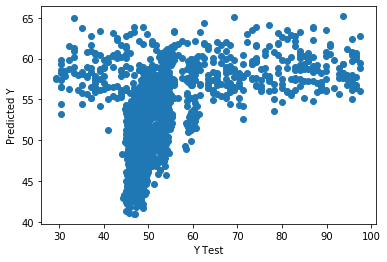

In [488]:
predictions1 = lm.predict( X_test)
scatter(y_test,predictions1)
xlabel('Y Test')
ylabel('Predicted Y')

In [489]:
print('MAE:', mean_absolute_error(y_test, predictions1))
print('MSE:', mean_squared_error(y_test, predictions1))
print('RMSE:', sqrt(mean_squared_error(y_test, predictions1)))
r2_score(y_test, predictions1)

MAE: 5.952210021122175
MSE: 91.38877859171768
RMSE: 9.559747830969062


0.21235733471853302

In [490]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
print(X_test.shape)

(2135, 39)


Text(0, 0.5, 'Predicted Y')

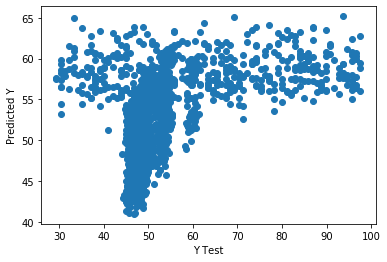

In [491]:
predictions2 = ridge.predict(X_test)
scatter(y_test,predictions2)
xlabel('Y Test')
ylabel('Predicted Y')

In [492]:
print('MAE:', mean_absolute_error(y_test, predictions2))
print('MSE:', mean_squared_error(y_test, predictions2))
print('RMSE:', sqrt(mean_squared_error(y_test, predictions2)))
r2_score(y_test, predictions2)

MAE: 5.952120551332924
MSE: 91.38874013373824
RMSE: 9.559745819515195


0.21235766617219598

In [493]:
from sklearn.linear_model import Lasso
las = Lasso(alpha=1.0)
las.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Text(0, 0.5, 'Predicted Y')

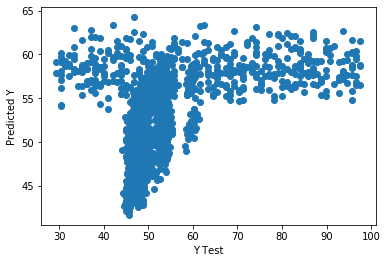

In [494]:
predictions3 = las.predict(X_test)
scatter(y_test,predictions3)
xlabel('Y Test')
ylabel('Predicted Y')

In [495]:
print('MAE:', mean_absolute_error(y_test, predictions3))
print('MSE:', mean_squared_error(y_test, predictions3))
print('RMSE:', sqrt(mean_squared_error(y_test, predictions3)))
r2_score(y_test, predictions3)

MAE: 5.899351722709104
MSE: 91.51404173547574
RMSE: 9.566297179968629


0.21127774269496602

In [537]:
df1=read_excel('Test_dataset.xlsx')
print(df1.shape)

df1=df1.drop(['people_ID','Gender','Region','Designation','Name','Married','Children'],axis=1)
print(df1)

(14498, 27)
      Occupation Mode_transport  cases/1M  Deaths/1M             comorbidity  \
0         Driver         Public         4          1                Diabetes   
1          Legal           Walk         4          1                Diabetes   
2          Sales            Car         4          1                Diabetes   
3          Sales            Car         4          1                    None   
4       Business            Car         4          1                Diabetes   
...          ...            ...       ...        ...                     ...   
14493    Cleaner           Walk        11          2  Coronary Heart Disease   
14494      Clerk            Car        11          2                    None   
14495   Business         Public        11          2                    None   
14496     Driver            Car        11          2  Coronary Heart Disease   
14497     Driver         Public        11          2                Diabetes   

       Age  Coma score Pulm

In [538]:
print(df1.isnull().any())
le=preprocessing.LabelEncoder()
ls=[0,1,4,7,8]
for i in ls:   
    df1.iloc[:,i]=le.fit_transform(df1.iloc[:,i])

for i in ls: 
    df1 = concat([df1,get_dummies(df1[df1.columns[i]], prefix=df1.columns[i])],axis=1)
    print(df1.shape)
df1.drop(['Occupation','Mode_transport','comorbidity','Pulmonary score','cardiological pressure'],axis=1, inplace=True)
print(df1.columns)



Occupation                False
Mode_transport            False
cases/1M                  False
Deaths/1M                 False
comorbidity               False
Age                       False
Coma score                False
Pulmonary score           False
cardiological pressure    False
Diuresis                  False
Platelets                 False
HBB                       False
d-dimer                   False
Heart rate                False
HDL cholesterol           False
Charlson Index            False
Blood Glucose             False
Insurance                 False
salary                    False
FT/month                  False
dtype: bool
(14498, 29)
(14498, 32)
(14498, 36)
(14498, 40)
(14498, 44)
Index(['cases/1M', 'Deaths/1M', 'Age', 'Coma score', 'Diuresis', 'Platelets',
       'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol', 'Charlson Index',
       'Blood Glucose', 'Insurance', 'salary', 'FT/month', 'Occupation_0',
       'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occ

In [539]:
print(df1)
result = lm.predict(df1)
result=DataFrame(result,columns=['Infec_Prob'])


       cases/1M  Deaths/1M  Age  Coma score  Diuresis  Platelets  HBB  \
0             4          1   52           3       388        153  196   
1             4          1   53          11       409         95  138   
2             4          1   35           9       440         40  166   
3             4          1   31          12       206         78   83   
4             4          1   51           6       229        109  207   
...         ...        ...  ...         ...       ...        ...  ...   
14493        11          2   55           5       417         16   36   
14494        11          2   44           4       199         22   29   
14495        11          2   46           6       161         15   28   
14496        11          2   34           5       174         31   24   
14497        11          2   27           4       126         16   63   

       d-dimer  Heart rate  HDL cholesterol  ...  comorbidity_2  \
0          240          85               53  ...        

In [540]:
df2=read_excel('Test_dataset.xlsx')
r=concat([df2.iloc[:,0],result],axis=1)
r.to_csv('march20Th.csv', index=False)  

In [542]:
print(r)

       people_ID  Infec_Prob
0           5942   51.810210
1          18664   50.415164
2           5603   53.718921
3           5649   56.557230
4           5099   50.827930
...          ...         ...
14493      23737   50.154685
14494      11171   52.664384
14495      23243   53.366986
14496      11199   56.312660
14497      10787   59.277617

[14498 rows x 2 columns]


/home/devi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Error when checking input: expected dense_17_input to have shape (38,) but got array with shape (45,)